# **Visualizações em Python (Parte II)**

## **Objetivos da aulas**

* Aprendeer a representar graficamente os dados em python.
* Compreender o uso básicos das bibliotecas mais utilizadas: Matplotlib e Searbon.

## **Subgráficos**

* Podemos definir uma **grade de gráficos** dentro da mesma figura.
* Em ```plt.subplots```, especificamos:
    * O número de *linhas* da grade -> ```nrows```
    * O número de *colunas* da grade -> ```ncols```
* O objeto ```ax``` **se transforma em um array**. Portanto, pode ser acessado via index

Vamos comparar a precipitação em janeiro, fevereiro e março ao longo dos anos. Qual será o mais seco?

1. Definimos um *objeto* ```ax``` com trâs linha e uma coluna única
    * No eixo ```x``` os anos
    * No eixo ```y``` as precipitações
Como os anos são os mesmos para todos os gráficos, colocamos o parâmetro ```sharex``` em ```True```

In [3]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_chuvas = pd.read_csv('https://raw.githubusercontent.com/jherfson/curso-coderhouse/main/aula5/10%20-%20pune_1965_to_2002.csv')
df_chuvas = df_chuvas.set_index('Year')
df_chuvas.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [5]:
mpl.style.use("ggplot")

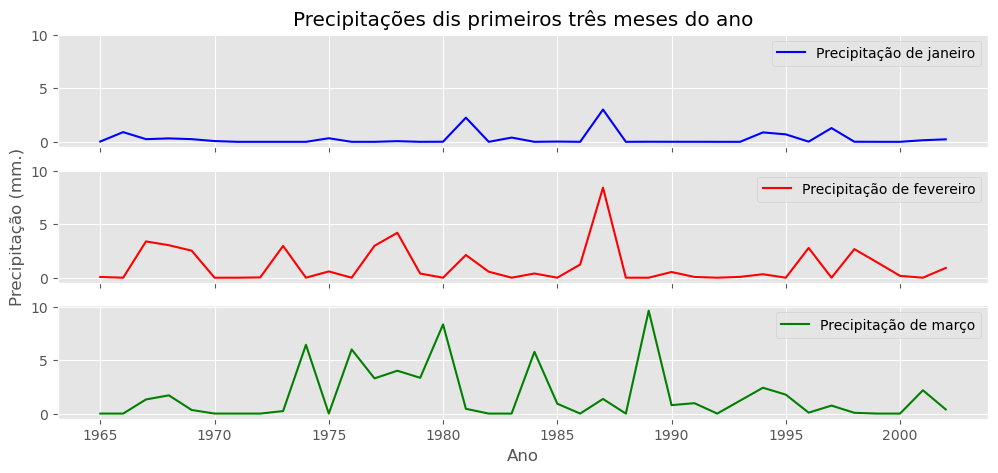

In [6]:
fig, ax = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(12, 5),
    sharex=True,
    sharey=True
)

# Para cada linha, atribuímos a precipitação de um mês
ax[0].plot(
    df_chuvas.index,
    df_chuvas['Jan'],
    label='Precipitação de janeiro',
    color='blue'
)
ax[1].plot(
    df_chuvas.index,
    df_chuvas['Feb'],
    label='Precipitação de fevereiro',
    color='red'
)
ax[2].plot(
    df_chuvas.index,
    df_chuvas['Mar'],
    label='Precipitação de março', 
    color='green'
)

# Por último, adicionamos texto e legendas
ax[0].set_title('Precipitações dis primeiros três meses do ano')
ax[1].set_ylabel('Precipitação (mm.)')
ax[2].set_xlabel('Ano')

ax[0].legend()
ax[1].legend()
ax[2].legend()

*Algumas observações...*

* Ao  passar ```sharey=True```, os subgráficos compartilharm a escala no eixo ```y```. Isso tornou possível comparar o volume de chuva em um relance.
* **Cada subgráfico pode ter seu próprio título e rótulos**.
* No caso de ter duas linhas e duas colunas, ```ax``` *se torna bidimensional*:
    * O subgráfico superior esquerdo é referenciado com ```ax[0, 0]```
    * O subgráfico superior direito é referenciado com ```ax[0, 1]```


## **Personalizando o Matplotlib**

* A Matplotlib permite que você modifique todos os aspectos de seus gráficos por meio de **parâmetros**.
* Ao importa a biblioteca, o Matplotlib estabelece seus **parâmetros padrão**.
* Os parâmetros são armazenados em uma estrutura de dados do **tipo dict**. Você pode obter uma lista dos parâmetros observando sus chaves.

```mpl.rcParams.keys()```

*Alguns parâmetros comuns...*

| **Parâmetro** | **Descrição** | **Valor padrão** |
|:----|:----|:----|
|```axes.grid```|Mostrar grade|True|
|```axes.titleweight```|Espessura tipografia título|normal|
|```axes.titlelocation```|Posição do título|center|
|```axes.grid.axis```|Eixos da grade|both|
|```axes.labelcolor```|Cor de etiquetas|black|
|```axes.labelsize```|Tamanho de fonte das etiquetas|large|
|```axes.labelweight```|Espessura de fonte das etiquetas|normal|
|```grid.alpha```|Transpaência da grade|1.0|
|```grid.color```|Cor da grade|```#b2b2b```|
|```grid.linestyle```|Estilo de grade|```--```|
|```grid.linewidth```|Espessura da grade|0.5|
|```legend.fontsize```|Tamanho da fonte da legenda|medium|

In [13]:
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlelocation'] = 'left' 
mpl.rcParams['axes.titlecolor'] = 'firebrick' 
mpl.rcParams['axes.labelcolor'] = 'blue' 
mpl.rcParams['axes.labelsize'] = '10' 
mpl.rcParams['axes.labelweight'] = 'light' 
mpl.rcParams['axes.linewidth'] = '1' 
mpl.rcParams['grid.color'] = 'black' 
mpl.rcParams['grid.linestyle'] = '-.' 
mpl.rcParams['grid.linewidth'] = '2' 

Text(0, 0.5, '(Etiqueta eixo vert.)')

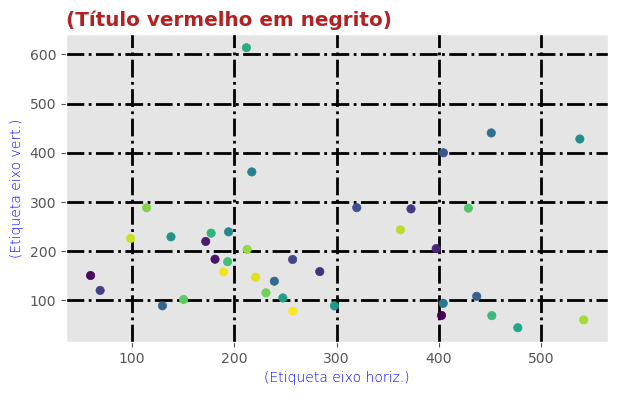

In [15]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(
    df_chuvas['Aug'],
    df_chuvas['Sep'],
    c=df_chuvas.index
)
ax.set_title('(Título vermelho em negrito)')
ax.set_xlabel('(Etiqueta eixo horiz.)')
ax.set_ylabel('(Etiqueta eixo vert.)')

## **Biblioteca Seaborn**
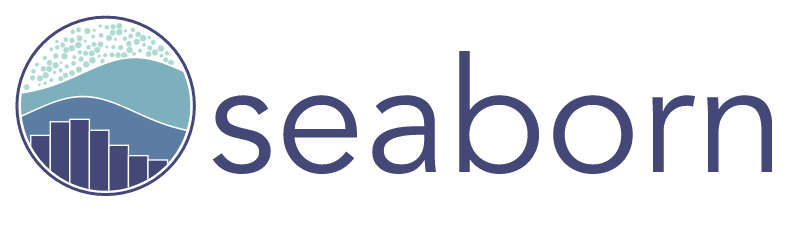

* **Funciona em cima da Matplotlib**
* Integra-se muito bem com as estruturas de dados do **Pandas**.
* Fornece métodos que facilitam a geração de gráficos para a comparação de variáveis categóricas.
* Fornece seus próprios estilos e cores.

*Questões a serem consideradas

* A Seaborn tem uma sintaxe um pouco **diferente do maplotlib**, então vamos tirar proveito dela apenas por seu ponto forte: as visualizações de variáveis categóricas.
* Uma vez que a Seaborn se baseia no matplotlib, você pode atualizar os parâmetros do matplotlib com os estilos da Seaborn e continuar a plotar normalmente.

```sns.set() # Aplicar default```

In [18]:
sns.set()

 A Seaborn traz alguns conjuntos de dados de teste, vamos explorar um:

In [21]:
df_exercicio = sns.load_dataset('exercise')
df_exercicio = df_exercicio.drop('Unnamed: 0', axis='columns')
df_exercicio.head()                

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


### **Seaborn**

Os valores são medidas do pulso de 30 pessoas após realizarem algum tipo de atividade por um determinado tempo. As colunas são:
* **Id**: número identificador da pessoa
* **Diet**: dieta da pessoa com gordura ou sem gorduras
* **Time**: duração do exercício 1 min, 15 min, 30 min
* **kind**: tipo de exercício repouso, caminhar ou correr

Observemos a distruibuição das medições depois 30 minutos de ter realizado o exercício.

1. Vamos extrair apenas aqueles observações que correspondam a um exercício de 30 minutos

In [24]:
df_30_min = df_exercicio[df_exercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


2. Represantamos graficamente as **distruições** com **sns.displot**

* Devemos especificar a coluna de valores no parâmetro ```x```, neste caso estamos interessados na coluna ```pulse```
* Como queremos separar as distruições de acordo com o tipo de atividade, passamos o parâmetro ```hue='kind'```

/home/jherfson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jherfson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Figure size 640x480 with 0 Axes>

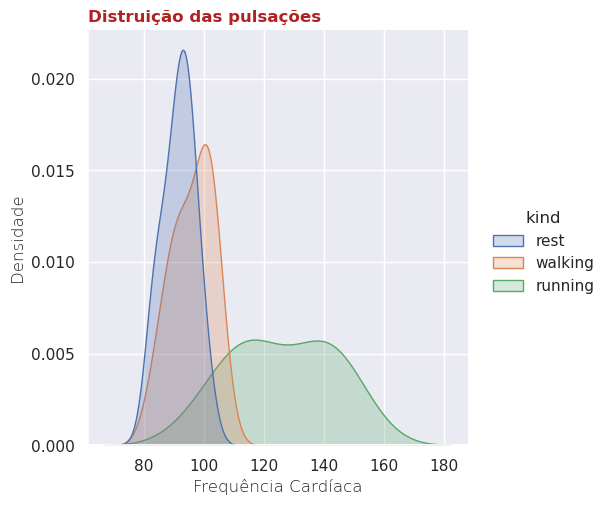

In [33]:
plt.figure()
ax = sns.displot(
    data=df_30_min,
    x='pulse',
    kind='kde',
    hue='kind',
    fill=True
)
ax.set(
    xlabel='Frequência Cardíaca',
    ylabel='Densidade',
    title='Distruição das pulsações'
)

Sem surpresa, aqueles que correram acabaram (em média) com uma frêquencia cardíaca mais alta do que aqueles que não correram.

* Com o parâmetro ```kind='kde'```, Seaborn realiza uma estimativa da distruição dos dados no dataframe. Em termos gerais, você pode pensar nesses tipos de gráficos como uma *versão suavizada do histograma de frequência relativas*.
* Com o parâmetro ```kind='hist'```, Seaborn irá traçar um histograma.
* O parâmetro ```fill``` adiciona o preenchimento debaixo da distruição.
* Para comparar as distruições com base nas dietas, basta alterar o parâmetro ```hue```